### Maximum Flow for Response Operations

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import linprog

#### Drawing the corresponding graph

In [2]:
G = nx.DiGraph()
nodes = ['A','B','C','D','E']
edges = [
    ('A','B'), ('A','C'),
    ('B','E'),
    ('C','B'), ('C','D'),
    ('D','E')
]
capacities = [300, 650, 450, 100, 470, 800]

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_edge_attributes(G, dict(zip(edges,capacities)), name='capacity')

In [3]:
pos = {
    'A': np.array([-.8,0.]),
    'B': np.array([0.,.2]),
    'C': np.array([-.3,-.2]),
    'D': np.array([.3,-.2]),
    'E': np.array([.8,0.]),
}

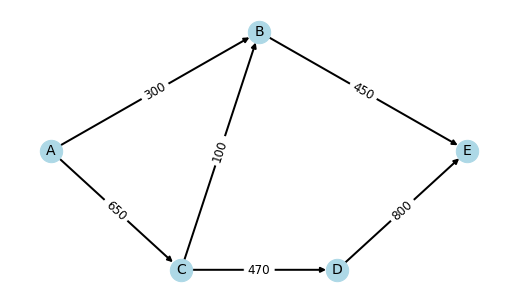

In [4]:
plt.figure(figsize=(7,4))
nx.draw(G, pos=pos, with_labels=True,
        node_color='lightblue',
        node_size=500, width=2,
        font_size=14)
nx.draw_networkx_edge_labels(G, pos, dict(zip(edges,capacities)), font_size=12)
plt.show()

#### Maximum flow problem

Using scipy.optimize to minimize
$$[-1 \hspace{.5em} -1 \hspace{.5em} 0 \hspace{.5em} 0 \hspace{.5em} 0 \hspace{.5em} 0] \cdot x,$$
such that
$$ A_{eq}x=b_{eq}, $$
$$ x_i \leq \text{capacity}(i) \hspace{1em} \forall i. $$

In [5]:
linprog(c = np.array([-1,-1,0,0,0,0]),
        A_eq = np.array([[1,0,-1,1,0,0], [0,1,0,-1,-1,0], [0,0,0,0,1,-1]]),
        b_eq = np.array([0,0,0]),
        bounds = [item for item in zip(np.zeros(len(capacities)), capacities)]
       )

     con: array([0., 0., 0.])
     fun: -870.0
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([300., 570., 400., 100., 470., 470.])

In [6]:
# Can also use networkx's maximum flow function to check:
nx.maximum_flow(G, 'A','E')

(870,
 {'A': {'B': 300, 'C': 570},
  'B': {'E': 400},
  'C': {'B': 100, 'D': 470},
  'D': {'E': 470},
  'E': {}})